In [1]:
import pandas as pd
from google.colab import drive

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score

In [4]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Mod2/Salud"

Mounted at /content/drive


In [5]:
ruta = "/content/drive/MyDrive/Mod2/Salud/data/df_limpia.xlsx"

#leer excel
df = pd.read_excel(ruta)
df

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627000,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351000,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,0.416104,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171000,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340000,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245000,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349000,47,1


In [6]:
X = df.drop(columns=['Diagnostico'])  # Características
y = df['Diagnostico']  # Etiqueta

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Dividir en 70% entrenamiento y 30% (validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, train_size=0.7, random_state=42)

# Ahora dividir el 30% restante en 20% validación y 10% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 1/3 de 30% es 10%

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f" X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f" X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (537, 8), y_train: (537,)
 X_val: (154, 8), y_val: (154,)
 X_test: (77, 8), y_test: (77,)


In [8]:
# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
X.columns

Index(['Embarazos', 'Glucosa', 'Presión Sanguínea', 'Espesor de la Piel',
       'Insulina', 'IMC', 'Función de Pedigrí de Diabetes', 'Edad'],
      dtype='object')

In [10]:
# Define los nombres de las columnas originales
column_names = ["Embarazos", "Glucosa", "Presión Sanguínea", "Espesor de la Piel",
              "Insulina", "IMC", "Función de Pedigrí de Diabetes'", "Edad"]  # Reemplaza con los nombres reales

# Convierte X_scaled a DataFrame usando los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=column_names)

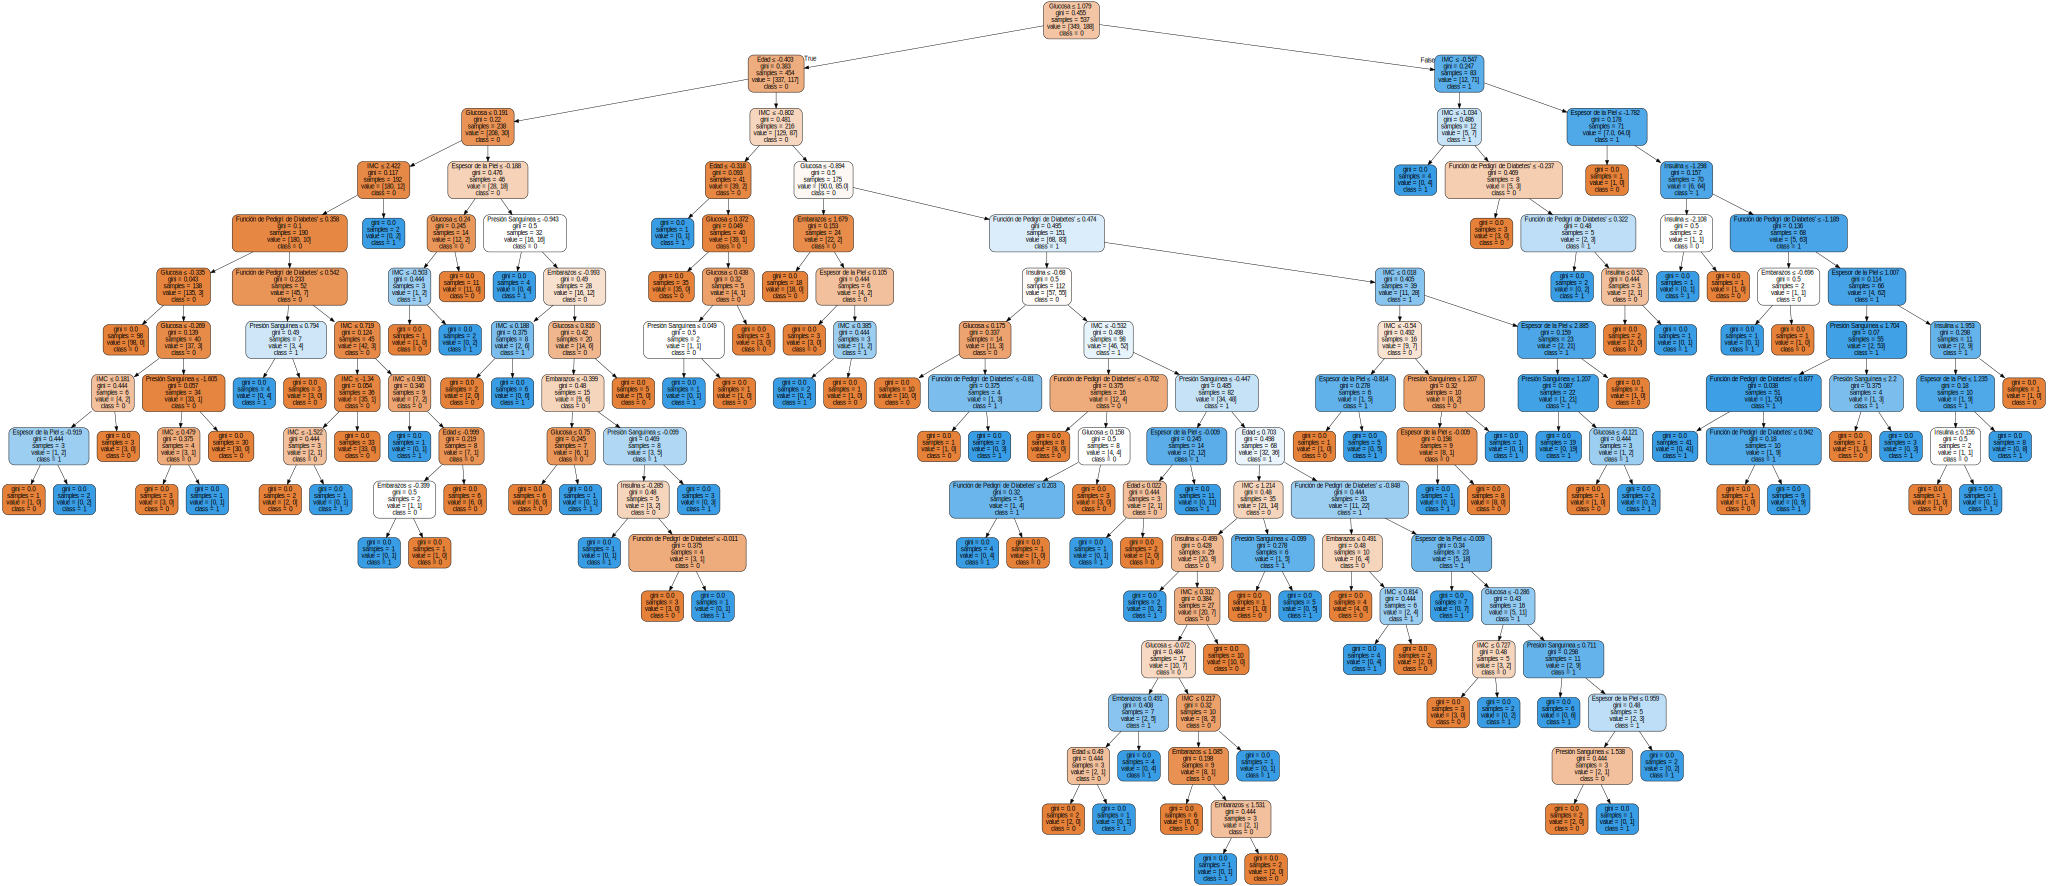

In [11]:
# Exportar el gráfico del árbol en formato DOT
dot_data = tree.export_graphviz(
    tree_model,
    feature_names=X_scaled_df.columns,  # Ahora usamos X_scaled_df.columns
    class_names=[str(c) for c in set(y)],
    filled=True,
    rounded=True,
    special_characters=True
)

# Crear  el gráfico
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

<font color='056938'> **Predicciones con los datos de entrenamiento**</font>

[[349   0]
 [  0 188]]


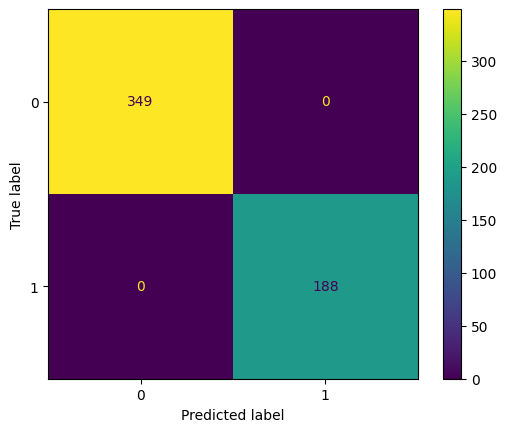

In [12]:
# Hacer predicciones en el conjunto de prueba
y_train_pred = tree_model.predict(X_train)

# Generar la matriz de confusión
cm_train = confusion_matrix(y_train, y_train_pred, labels=tree_model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tree_model.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_train)

In [14]:
tn, fp, fn, tp = cm_train.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy train: 1.0
Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0


<font color='056938'> **Predicciones con los datos de validación**</font>

[[73 26]
 [17 38]]


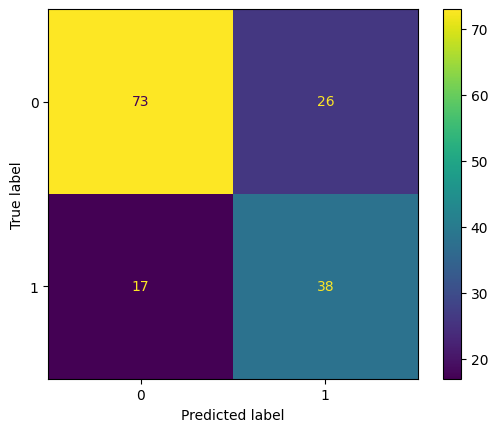

In [15]:
# Hacer predicciones en el conjunto de prueba
y_val_pred = tree_model.predict(X_val)

# Generar la matriz de confusión
cm_val = confusion_matrix(y_val, y_val_pred, labels=tree_model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=tree_model.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_val)

In [16]:
tn, fp, fn, tp = cm_val.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy val: {accuracy_score(y_val, y_val_pred)}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy val: 0.7207792207792207
Precision: 0.59375
Recall: 0.6909090909090909
Especificidad: 0.7373737373737373
F1 score: 0.6386554621848739



**Modelo con restricciones de parada**

Se construye un modelo, aplicando restricciones específicas en la estructura de los árboles. Estas restricciones incluyen la definición de una profundidad máxima y el establecimiento de un número máximo de nodos hoja. Estas limitaciones buscan reducir el riesgo de sobreajuste.

In [17]:
#entrenar el modelo con restricciones
tree_model2 = DecisionTreeClassifier(
    random_state=42,   # Para reproducibilidad
    max_depth=5,       # Limitar la profundidad del árbol
    min_samples_split=10,  # Mínimo 10 muestras para dividir un nodo
    min_samples_leaf=5,    # Mínimo 5 muestras en cada hoja
    max_leaf_nodes=20      # Máximo 20 hojas en el árbol
)

tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score

# Predicciones
y_pred = tree_model2.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [19]:
from sklearn.metrics import accuracy_score

# Predicciones
y_pred = tree_model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66



<font color='056938'> **Predicciones con los datos de prueba**</font>

[[36 16]
 [10 15]]


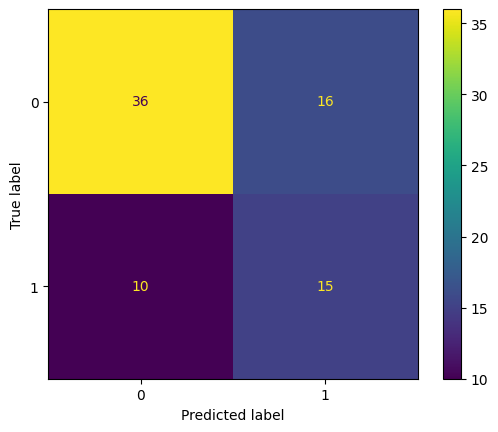

In [20]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = tree_model.predict(X_test)

# Generar la matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred, labels=tree_model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tree_model.classes_)
disp.plot()

# Imprimir la matriz de confusión
print(cm_test)

In [21]:
tn, fp, fn, tp = cm_test.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy test: {accuracy_score(y_test, y_test_pred)}")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Accuracy test: 0.6623376623376623
Precision: 0.4838709677419355
Recall: 0.6
Especificidad: 0.6923076923076923
F1 score: 0.5357142857142857
